### ¿Cómo evoluciona la cantidad de establecimientos educacionales que operan efectivamente en Chile desde 2018 a 2022?
Fuente: Datos Abiertos Mineduc

Importación de Librerías

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Cargar los datos

In [2]:
df_2022= pd.read_csv("./Resumen-matricula-EE-2022-2/20221013_Resumen_Matricula_EE_Oficial_2022_20220430_WEB.csv", sep=";")
df_2021= pd.read_csv("./Resumen-matricula-EE-2021/Resumen_Matricula_EE_Oficial_2021.csv", sep=";")
df_2020= pd.read_csv("./Resumen-matricula-EE-2020/Resumen_Matricula_EE_Oficial_2020.csv", sep=";")
df_2019= pd.read_csv("./Resumen-matricula-EE-2019/Resumen_Matricula_EE_Oficial_2019.csv", sep=";")
df_2018= pd.read_csv("./Resumen-matricula-EE-2018/Resumen_Matricula_EE_Oficial_2018.csv", sep=";")

Tomando en cuenta el documento de apoyo a los datos:

ESTADO_ESTAB  -->  Estado del Establecimiento  
1: Funcionando  
2: En receso  
3: Cerrado  
4: Autorizado sin matrícula

Podemos filtrar la cantidad de establecimientos que funcionan efectivamente y ver como evoluciona a lo largo de 5 años.

In [3]:
# Lista de los dataset
data_2022_2018 = [df_2022, df_2021, df_2020, df_2019, df_2018]

# Guardamos la cantidad por año
qty_educacional_institutions_by_year = []

# Extraer la cantidad por año desde cada dataset
for df in data_2022_2018:
    qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 1)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year}
df_edu_inst_by_year = pd.DataFrame(data_dict)


C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\159414008.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 1)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\159414008.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 1)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\159414008.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFram

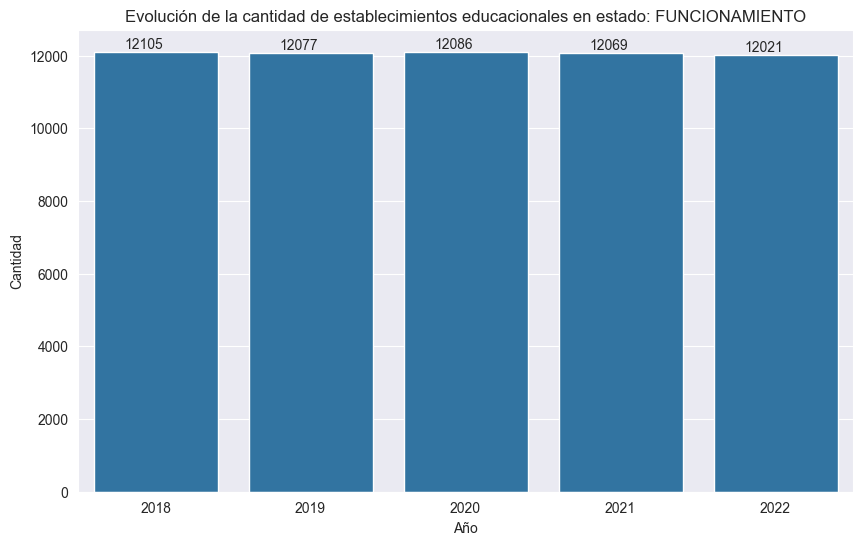

In [4]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year["Cantidad"]):
    plt.text(v-0.2, i+100, s=str(i) )
    plt.title("Evolución de la cantidad de establecimientos educacionales en estado: FUNCIONAMIENTO")
plt.show()

# ¿Cómo evolucionan las otras categorías?

### En receso

In [5]:
# Extraer la cantidad por año desde cada dataset
qty_educacional_institutions_by_year = []
for df in data_2022_2018:
    qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 2)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year}
df_edu_inst_by_year = pd.DataFrame(data_dict)

C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\2664460472.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 2)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\2664460472.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 2)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\2664460472.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

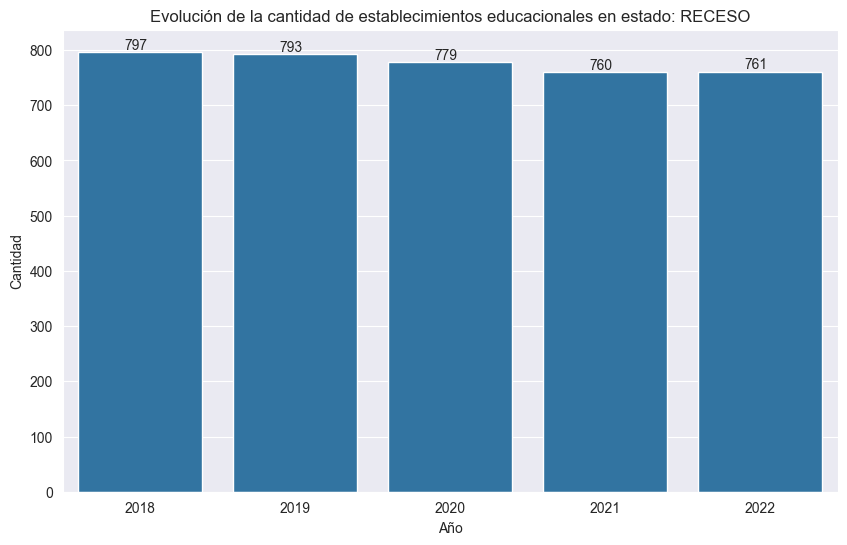

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year["Cantidad"]):
    plt.text(v-0.1, i+5, s=str(i) )
    plt.title("Evolución de la cantidad de establecimientos educacionales en estado: RECESO")
plt.show()

### Cerrado

In [7]:
# Extraer la cantidad por año desde cada dataset
qty_educacional_institutions_by_year = []
for df in data_2022_2018:
    qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 3)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year}
df_edu_inst_by_year = pd.DataFrame(data_dict)

C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\3094703447.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 3)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\3094703447.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 3)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\3094703447.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

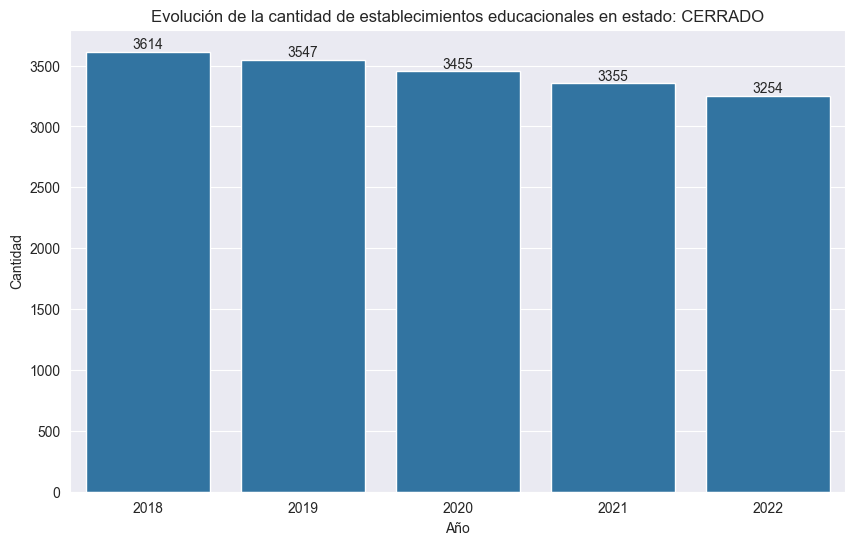

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year["Cantidad"]):
    plt.text(v-0.1, i+25, s=str(i) )
    plt.title("Evolución de la cantidad de establecimientos educacionales en estado: CERRADO")
plt.show()

### Autorizado sin matrícula

In [9]:
# Extraer la cantidad por año desde cada dataset
qty_educacional_institutions_by_year = []
for df in data_2022_2018:
    qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 4)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year}
df_edu_inst_by_year = pd.DataFrame(data_dict)

C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\858063768.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 4)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\858063768.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 4)].count()[0])
C:\Users\gonza\AppData\Local\Temp\ipykernel_17816\858063768.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFram

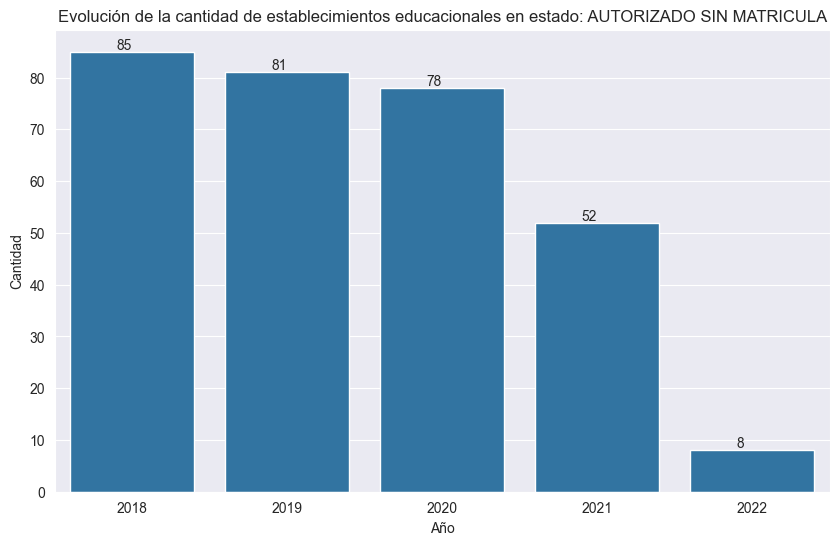

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year["Cantidad"]):
    plt.text(v-0.1, i+0.5, s=str(i) )
    plt.title("Evolución de la cantidad de establecimientos educacionales en estado: AUTORIZADO SIN MATRICULA")
plt.show()